# PCA
* Group 19
* Phase 1
* 20190183
* 20190593
* 20190645

# 1- Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler


# 2 - Load Dataset

In [7]:
iris = load_iris()
# Make DataSet is unlabeled
iris_df = pd.DataFrame(iris.data,columns=[iris.feature_names])

In [8]:
iris_df.columns=iris_df.columns.sort_values()
iris_df.head()

,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
X = iris_df.iloc[:,:]
# Shape (rows , columns)
X.shape

(150, 4)

In [10]:
# Standralization
X = StandardScaler().fit_transform(X)
print(X[0:5])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


# 3 - PCA From Scratch

In [11]:
class PCA:
     
    def __init__(self,number_of_important_features=2):
        # number of specified features
        # Default being passed as 2
        self.number_of_important_features=number_of_important_features
        # Best possible features
        self.features=None
        self._mean=None
        
        
    def fit(self,X):

# 1- X_Meaned
        # placing mean to as origin of axis
        # axis =0 is mean of rows along the column direction 
        # X (Meaned) = X - Mean
        self._mean=np.mean(X,axis=0)
        X=X-self._mean
        
# 2- Covariance Matrix
        # Co-variance of N,D  ---> DxD
        covariance=np.dot(X.T,X)/(X.shape[0]-1)
        print("Cov_shape : ",covariance.shape)

# 3- Eigen Values , Vectors
        eigenvalues,eigenvector=np.linalg.eig(covariance)

        # eigen values
        print("eigenvalues-->",eigenvalues.shape)
        print("eigenvalues \n",eigenvalues)

        # eigen vectors
        print("eigenvector-->",eigenvector.shape)
        print("eigenvector \n",eigenvector)

# 4 - sort the eigenvalues from highest to lowest
        eigenvector=eigenvector.T
        print("eigenvector.T-->",eigenvector.shape)
        print("eigenvector after Transpose\n",eigenvector)
        #sort
        indexs=np.argsort(eigenvalues)[::-1]
        #taking those indices and storing in eigenvalues and eigenvectors accordingly
        eigenvector=eigenvector[indexs]
        print("eigenvector-indexs-->",eigenvector.shape)
        print("eigenvector after indexes \n",eigenvector)
        eigenvalues=eigenvalues[indexs]
        print("eigenvalues-indexs-->",eigenvalues.shape)
        print("eigenvalues \n",eigenvalues)
        
        ## variance of each feature
        total = sum(eigenvalues)
        variance_of_each_feature = [(i / total)*100 for i in eigenvalues]
        print("variance of each feature-->",variance_of_each_feature)
        
# 5- Now taking only  specified componenets
        self.features=eigenvector[:self.number_of_important_features]
        print("self.features",self.features.shape)
        # So, now we have chosen most significant features componenet
        
# 6- Applying PCA
    def apply(self,X):
        # Here we project the data onto Principal component line
        X=X-self._mean
        # Here X-->(N,4);self.features-->2,4
        # (X,self.features.T)-->(N,4)x(4,2)==(N,2) i.e N samples with 2 feature vector 
        return np.dot(X,self.features.T)

In [27]:
# Set No. of Components
pca=PCA(2)

In [28]:
# fitting
pca.fit(X)

Cov_shape :  (4, 4)
eigenvalues--> (4,)
eigenvalues 
 [2.93808505 0.9201649  0.14774182 0.02085386]
eigenvector--> (4, 4)
eigenvector 
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]
eigenvector.T--> (4, 4)
eigenvector after Transpose
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [-0.37741762 -0.92329566 -0.02449161 -0.06694199]
 [-0.71956635  0.24438178  0.14212637  0.63427274]
 [ 0.26128628 -0.12350962 -0.80144925  0.52359713]]
eigenvector-indexs--> (4, 4)
eigenvector after indexes 
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [-0.37741762 -0.92329566 -0.02449161 -0.06694199]
 [-0.71956635  0.24438178  0.14212637  0.63427274]
 [ 0.26128628 -0.12350962 -0.80144925  0.52359713]]
eigenvalues-indexs--> (4,)
eigenvalues 
 [2.93808505 0.9201649  0.14774182 0.02085386]
variance of each feature--> [72.9624454132999, 22.85

* **Select The most 2 important components According to highest varinces of each feature**
* **As you can see the variance of first two features equals :**

  **72.9624454132999 + 22.850761786701746 = 95.813207200001646**
   
  **---> Thus we chose these two as PCA**


# 4 - Plotting 

In [29]:
projected=pca.apply(X)


In [30]:
x0=projected[:,0]
x1=projected[:,1]

In [31]:
y=iris.target

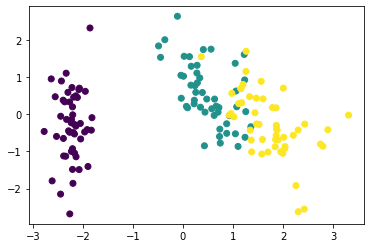

In [32]:
plt.scatter(x0,x1,c=y)

**It Gives a good Variance in plot As we Takes The Most 2 Importnat Featuers As Our PCA Components**